In [1]:
import csv
import numpy as np


from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:

dates = []
prices = []


In [3]:

def get_data(filename):
	with open(filename, 'r') as csvfile:
		csvFileReader = csv.reader(csvfile)
		next(csvFileReader) # skipping column names
		for row in csvFileReader:
			dates.append(int(row[0].split('-')[0]))
			prices.append(float(row[1]))
	return


In [4]:

def predict_price(dates, prices, x):
	dates = np.reshape(dates, (len(dates),1)) # converting to matrix of n X 1
	prices = np.reshape(prices, (len(prices),1))
	
	linear_mod = linear_model.LinearRegression() # defining the linear regression model
	linear_mod.fit(dates, prices) # fitting the data points in the model
	
	plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
	plt.plot(dates, linear_mod.predict(dates), color= 'red', label= 'Linear model') # plotting the line made by linear regression
	plt.xlabel('Date')
	plt.ylabel('Price')
	plt.title('Linear Regression')
	plt.legend()
	plt.show()
	
	return linear_mod.predict(x)[0][0], linear_mod.coef_[0][0], linear_mod.intercept_[0]


In [5]:

get_data('goog.csv') # calling get_data method by passing the csv file to it


In [6]:
print ("Dates- ", dates)
print ("Prices- ", prices)


Dates-  [26, 25, 24, 23, 22, 19, 18, 17, 16, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1]
Prices-  [708.58, 700.01, 688.92, 701.45, 707.45, 695.03, 710.0, 699.0, 692.98, 690.26, 675.0, 686.86, 672.32, 667.85, 703.87, 722.81, 770.22, 784.5, 750.46]


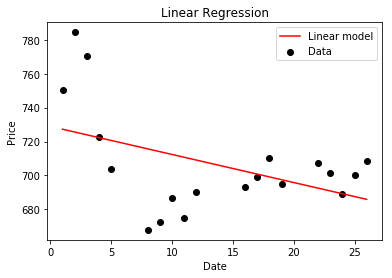

In [7]:

predicted_price, coefficient, constant = predict_price(dates, prices, 29)  


In [8]:
print ("\nThe stock open price for 29th Feb is: $", str(predicted_price))
print ("The regression coefficient is ", str(coefficient), ", and the constant is ", str(constant))
print ("the relationship equation between dates and prices is: price = ", str(coefficient), "* date + ", str(constant))



The stock open price for 29th Feb is: $ 680.9255198
The regression coefficient is  -1.65535514798 , and the constant is  728.930819091
the relationship equation between dates and prices is: price =  -1.65535514798 * date +  728.930819091
